<style>
.rendered_html * + ul {
	margin-top: 0.5em;
}
    div.text_cell_render {
    padding: 0.0em 0.0em 0.0em 0.0em;
}
    .reveal p {
    margin: 20px 10;
    line-height: 1.3;
}
    html, body, .reveal div, .reveal span, .reveal applet, .reveal object, .reveal iframe, .reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6, .reveal p, .reveal blockquote, .reveal pre, .reveal a, .reveal abbr, .reveal acronym, .reveal address, .reveal big, .reveal cite, .reveal code, .reveal del, .reveal dfn, .reveal em, .reveal img, .reveal ins, .reveal kbd, .reveal q, .reveal s, .reveal samp, .reveal small, .reveal strike, .reveal strong, .reveal sub, .reveal sup, .reveal tt, .reveal var, .reveal b, .reveal u, .reveal center, .reveal dl, .reveal dt, .reveal dd, .reveal ol, .reveal ul, .reveal li, .reveal fieldset, .reveal form, .reveal label, .reveal legend, .reveal table, .reveal caption, .reveal tbody, .reveal tfoot, .reveal thead, .reveal tr, .reveal th, .reveal td, .reveal article, .reveal aside, .reveal canvas, .reveal details, .reveal embed, .reveal figure, .reveal figcaption, .reveal footer, .reveal header, .reveal hgroup, .reveal menu, .reveal nav, .reveal output, .reveal ruby, .reveal section, .reveal summary, .reveal time, .reveal mark, .reveal audio, .reveal video {
    margin-bottom: -1px;
}
    div.text_cell_render {
    padding: 0em 0em 0.5em 0.0em;
}
</style>

# Exam Talk 2


# Agenda

In this second exam talk, we will cover:
1. Useful Information
1. Whether to Use ML (in the Exam)
2. Determine Model Framework: Core Principles
3. Applying Supervised Machine Learning

# Useful Information

## Deadlines

**Exam project description due: August 20, 20:00**
- Upload to Absalon

**Exam project due: August 28, 10:00**
- Upload through Digital Exam

## Some Requirements

You can find the formal requirements for the exam project on our website [website](https://isdsucph.github.io/isds2024/page/practical/).

We just want to mention: The report is limited to the following maximum number of pages (normalsider)*:
- 1 person: 9 pages
- 2 persons: 12 pages
- 3 persons: 15 pages
- 4 persons: 18 pages

_\* Note that 1 page (normalside) corresponds 2,400 and does not count figures, abstract, list of reference, frontpage, appendix_

_\* Front page must state the character count_

# Whether to Use ML (in the Exam)

## When to Use a Model
*When should I model data?*

Look at your research question. You should use a model when:

1. you try to explain or predict a certain variable, and;

2. a conclusion cannot be made without a model.
      

Great analyses can come without models: inequality graph in 20th century by Piketty, Saez
      
<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/2008_Top1percentUSA.png/450px-2008_Top1percentUSA.png' alt="Drawing" style="width: 600px;"/></center>

  

## When to Use Machine Learning
*Machine learning is powerful, when should I use it?*

So give you have decided that modelling is the correct approach. Should you then apply machine learning?

$$ y = X\beta + u $$

What is the goal?
- To understand how a given variable(s) relates to the outcome, and to make a formal test about the model parameters $\beta$?
    - Questions like: How does X affect/relate to Y?
    - **Use econometrics/OLS**
- To predict a given target using new and interesting data?
    - Questions like: Can data on X help us in predicting Y? 
    - **Use machine learning**    
    - But can I still investigate effects of a variable?
        - Add/remove variables and see how predictive performance change.
        - Some packages come with _feature importance (variable importance_)
        - We can visualize partial effects, e.g. partial dependence plots [PDP](https://www.kaggle.com/code/dansbecker/partial-dependence-plots/notebook)


## What to Use Machine Learning For
*What analysis can you do with machine learning?*

Ask questions like:

- Which model performance is best (with, without reguralarization)?
    - Which level of regularization?
- Does this new group of features help us predict our target?
- Is your model biased/fair? 
    - E.g. you have explicitly included information about minority groups but you can see that minority groups on average are treated differently.

# Determine Model Framework: Core Principles

## Step A: What Problem

What kind of problem am I working on? My target is,
- Continuous:
  - We want to use a regression model
  - We aim for a model with the least mean squared error (MSE).
- Categorical / finite integers:
  - We want to use a classification model
  - We aim for a model with best classification properties
      - Think about metrics for classification!


## Step B: Which Model
Depending on the problem, we pick a specific model. If regression, pick:
- A linear model (least squares, lasso, ridge, elastic net)

If classification use:
- Probably logistic regression (w/ or w/o regularization)

Note: You are welcome to try out other more complicated models. Note:
- You are not given any additional points for this.
    - Random forest is not too difficult to implement
    - Neural networks require more practice (structure of code is different)
- Be sure to explain how the models work in your project (but keep it somewhat brief...)


## Step C: Determine hyperparameters
What hyperparameters exist for the model I have chosen?
  - Ridge/Lasso: $\lambda$;
  - Elastic net: $\lambda_1$, $\lambda_2$;


# Applying Supervised Machine Learning

## Step 1: Data Split

Split into test and development (train) data.
- A normal split is 30 pct. for test and 70 pct. for train if you have moderate amount of observations.
- As you the number of observations increase you can increase the fraction used for training (e.g more than 100,000 observations you could use 20 pct. for test, 80 pct. for train. etc.)

Polynomial transformation of features:
  - This step is optional - only makes sense for linear and logistic models (e.g. lasso)


## Step 2: Model Pipeline
Construct a model building pipeline.
- Preprocessing phase
  - Preprocessing: polynomial expansion, variable scaling (optional)
- Supervised model (classification or regression)

Note: It is optional on whether to use `make_pipeline`. We recommend using it as there will be fewer mistakes and contain less code.


## Step 3: Model Selection (I/II)

Main idea:
- We want to select the optimal model.
- We measure model performance with out-of-sample prediction on validation data.

Implementation:
- Pick the model which performed the best on the validation data during (some variation of) cross validation.

## Step 3:  Model Selection (II/II)

Cross validation (CV):
- We only use the training/development data.
- In general, we use 10 fold CV and split this data into 10 even sized validation bins (but reduce to 5 or 3 if your data set is large)
- For each validation bin:.
  - We fit our model on the data outside the validation bin, i.e. in one of the remaining 9 bins..
  - We transform and predict the target in the validation bin using our model.
  - Note: we must perform our whole model building process and transformation in each fold.

Finally, we compute the mean across the 10 validation bins for each hyperparameter combination we are testing and pick the one that maximize out-of-sample performance.

*Note*: It is perfectly OK to apply the built-in modules for doing these things. You do not have to implement the things manually as we did in the exercises.

## Step 4: Check List

- Check that we have NO data leakage
    - I.e. NEVER fit our model building on validation/test data.
    - Be particularly careful with time series
        - Cannot use random splitting since we may end up using the future to predict the past 
        - Modules to help you handle time series do [exist](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html)

## Step 5: Final Model Training and Evaluation

We train the model with the optimal hyperparameters on ALL the training/development data.

Evaluate the model out-of-sample on the test set (summarize and discuss results)


# Example from previous years 


Former exam projects are available on Absalon 

# Code for plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Plots of ML types

C:\Users\xtw562\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


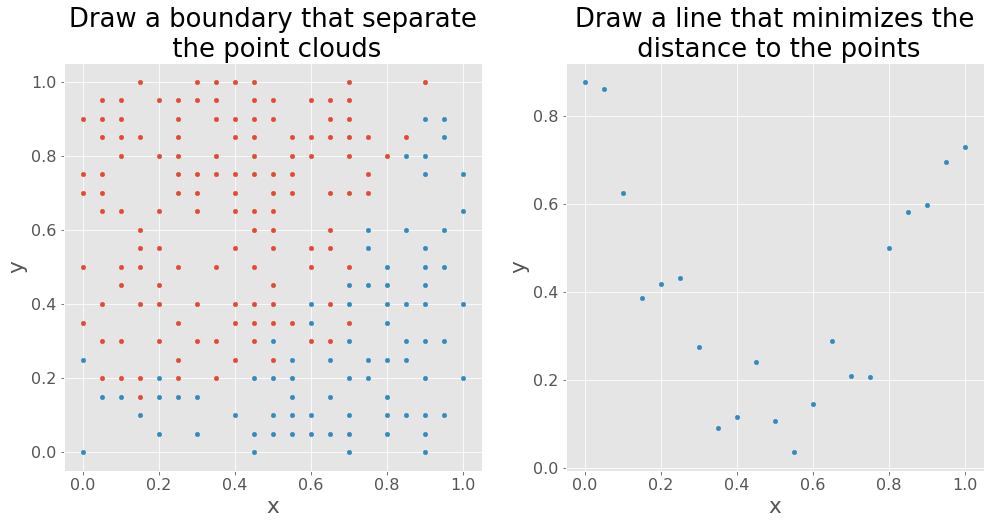

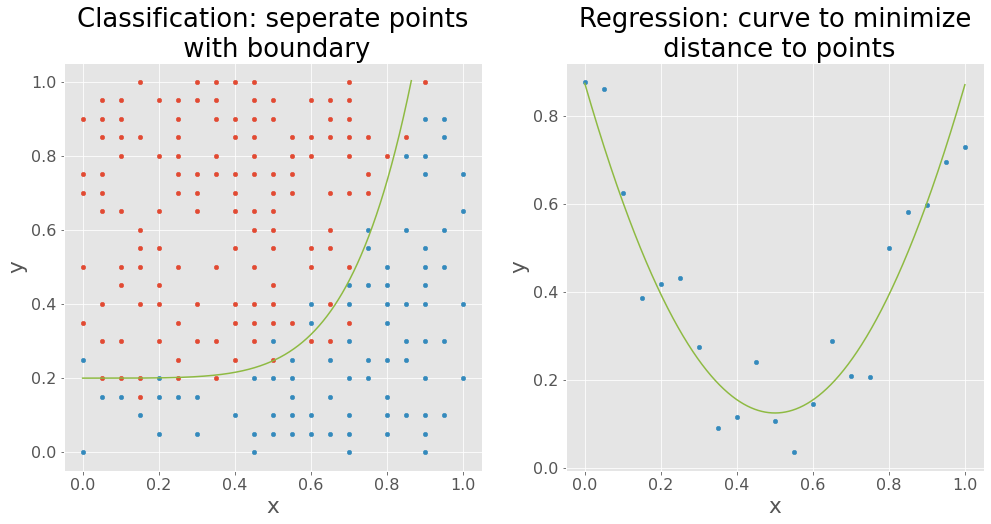

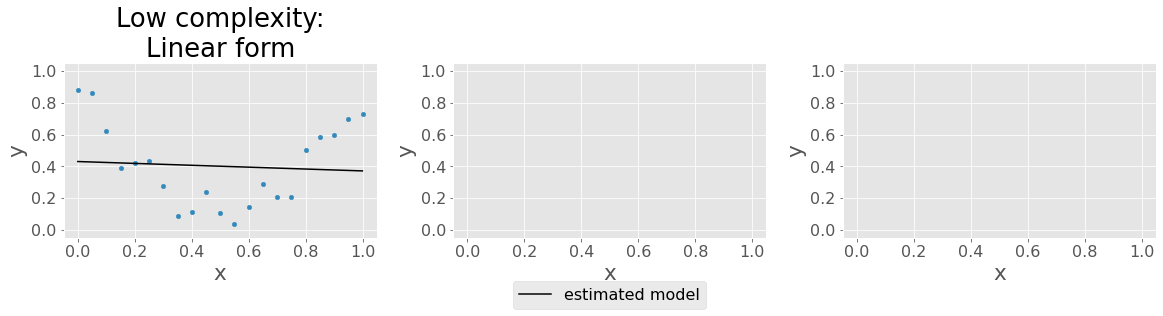

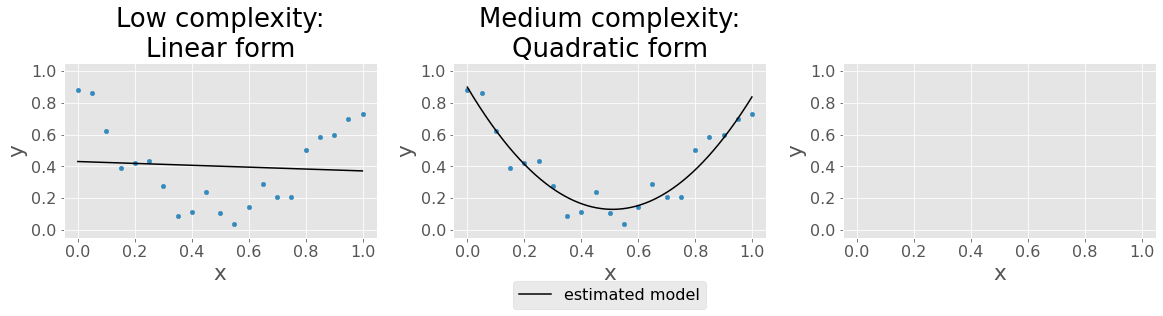

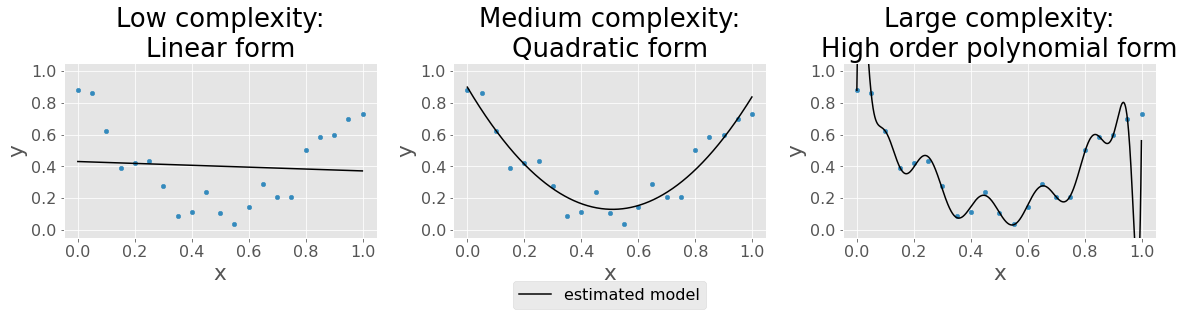

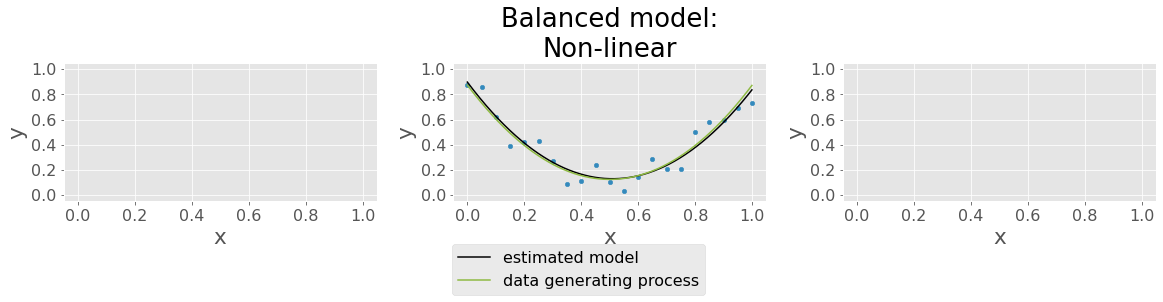

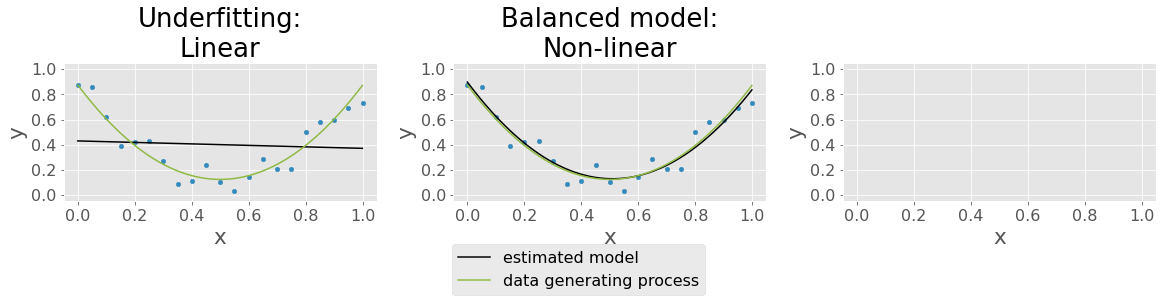

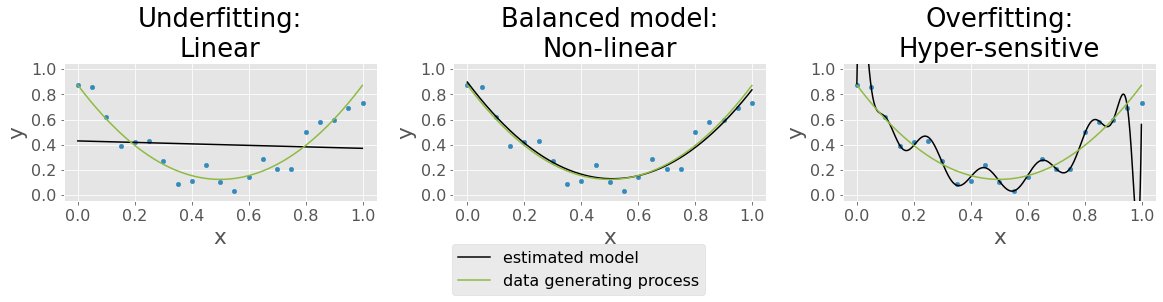

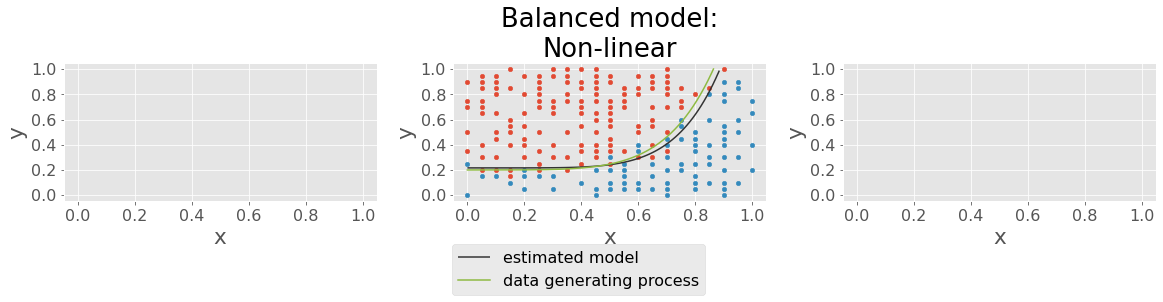

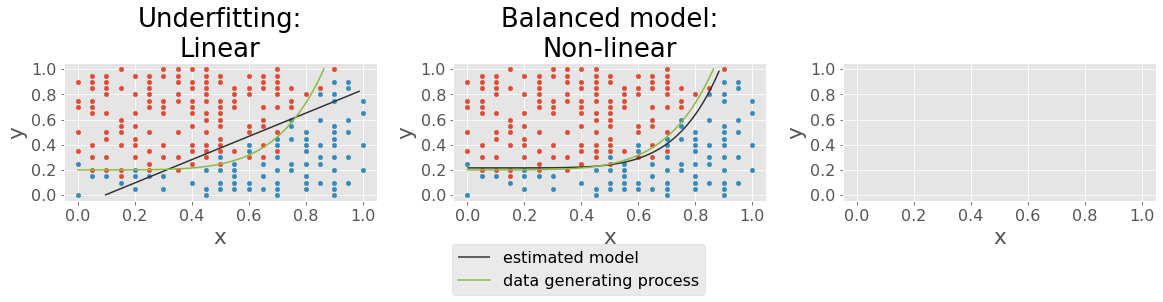

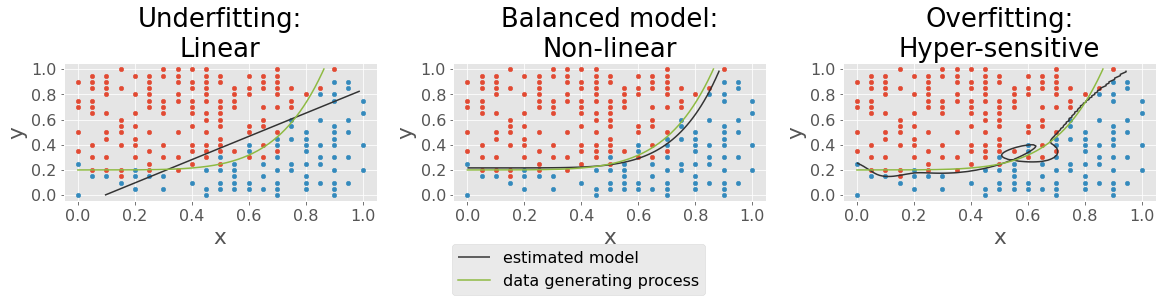

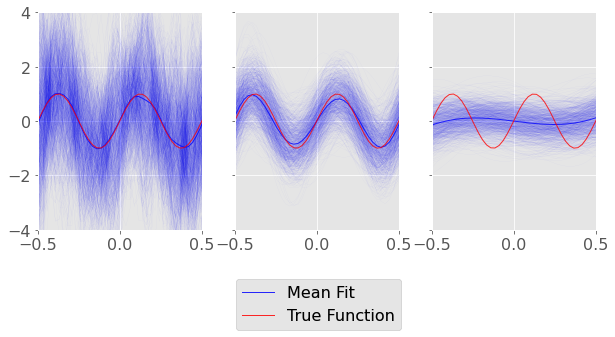

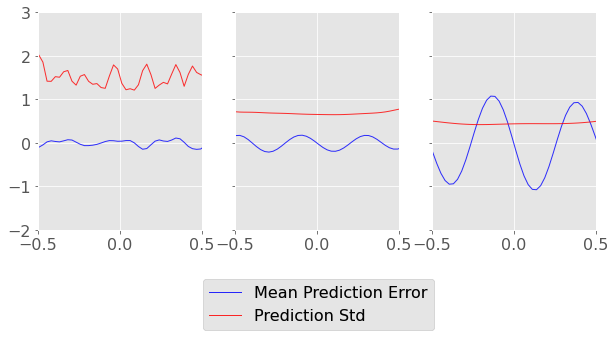

In [3]:
%run ../ML_plots.ipynb